In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from mpl_toolkits import mplot3d
import time
import csv
import sklearn.utils as utils

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font',family='serif')

In [10]:
def extractData(filename):
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    return data

def writeResult(filename, data):
    with open(filename, 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        for row in data:
            spamwriter.writerow(row)

## Test using different values of $\nu$

In [98]:
test_ratio   = 0.3
Nsample     = 1500
nu_vec    = np.linspace(0.001, 0.9, 500)
vc = ['v0c0','v0c1','v1c0','v1c1']
score_mtr = np.zeros((4,len(nu_vec)))
Ntrain = int((1-test_ratio)*Nsample)
nuopt = np.zeros(4)
maxscore = np.zeros(4)

for j in range(0,4):

    data = extractData('/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/NewRealistic/'+vc[j]+'test_x.csv')
    labels = extractData('/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/NewRealistic/'+vc[j]+'test_tag.csv') #this is mantained through sets and methods, only change when you cahnge versions
    data,labels=utils.shuffle(data,labels)

    xtrain=data[:Ntrain]
    ytrain=labels[:Ntrain]
    xtest=data[Ntrain:Nsample]
    ytest=labels[Ntrain:Nsample]
    
    # train for different values of nu
    
    score_vec  = np.zeros(len(nu_vec))
    for i in range(0,len(nu_vec)):
        nu       = nu_vec[i]
        clf = make_pipeline(StandardScaler(), NuSVC(nu=nu))
        clf.fit(xtrain, ytrain.ravel())
        score_vec[i] = clf.score(xtest, ytest)
        
        print('--------------------------------------------')
        print(r'$\nu$ = ', nu)
    
    score_mtr[j,:] = score_vec
    maxscore[j] = np.amax(score_vec)
    index = np.where(score_vec == np.amax(score_vec))
    print('index :', index)
    nuopt[j] = nu_vec[index[0][0]]
        

--------------------------------------------
$\nu$ =  0.001
--------------------------------------------
$\nu$ =  0.002801603206412826
--------------------------------------------
$\nu$ =  0.004603206412825652
--------------------------------------------
$\nu$ =  0.006404809619238477
--------------------------------------------
$\nu$ =  0.008206412825651304
--------------------------------------------
$\nu$ =  0.01000801603206413
--------------------------------------------
$\nu$ =  0.011809619238476954
--------------------------------------------
$\nu$ =  0.01361122244488978
--------------------------------------------
$\nu$ =  0.015412825651302607
--------------------------------------------
$\nu$ =  0.017214428857715434
--------------------------------------------
$\nu$ =  0.01901603206412826
--------------------------------------------
$\nu$ =  0.020817635270541084
--------------------------------------------
$\nu$ =  0.02261923847695391
--------------------------------------------

--------------------------------------------
$\nu$ =  0.20277955911823647
--------------------------------------------
$\nu$ =  0.20458116232464932
--------------------------------------------
$\nu$ =  0.20638276553106213
--------------------------------------------
$\nu$ =  0.20818436873747498
--------------------------------------------
$\nu$ =  0.2099859719438878
--------------------------------------------
$\nu$ =  0.2117875751503006
--------------------------------------------
$\nu$ =  0.21358917835671345
--------------------------------------------
$\nu$ =  0.21539078156312627
--------------------------------------------
$\nu$ =  0.2171923847695391
--------------------------------------------
$\nu$ =  0.21899398797595193
--------------------------------------------
$\nu$ =  0.22079559118236475
--------------------------------------------
$\nu$ =  0.22259719438877756
--------------------------------------------
$\nu$ =  0.2243987975951904
------------------------------------------

--------------------------------------------
$\nu$ =  0.40455911823647295
--------------------------------------------
$\nu$ =  0.4063607214428858
--------------------------------------------
$\nu$ =  0.40816232464929864
--------------------------------------------
$\nu$ =  0.40996392785571145
--------------------------------------------
$\nu$ =  0.41176553106212427
--------------------------------------------
$\nu$ =  0.4135671342685371
--------------------------------------------
$\nu$ =  0.41536873747494996
--------------------------------------------
$\nu$ =  0.4171703406813628
--------------------------------------------
$\nu$ =  0.4189719438877756
--------------------------------------------
$\nu$ =  0.4207735470941884
--------------------------------------------
$\nu$ =  0.4225751503006012
--------------------------------------------
$\nu$ =  0.42437675350701404
--------------------------------------------
$\nu$ =  0.4261783567134269
--------------------------------------------


--------------------------------------------
$\nu$ =  0.6135450901803607
--------------------------------------------
$\nu$ =  0.6153466933867736
--------------------------------------------
$\nu$ =  0.6171482965931864
--------------------------------------------
$\nu$ =  0.6189498997995992
--------------------------------------------
$\nu$ =  0.6207515030060121
--------------------------------------------
$\nu$ =  0.6225531062124249
--------------------------------------------
$\nu$ =  0.6243547094188377
--------------------------------------------
$\nu$ =  0.6261563126252505
--------------------------------------------
$\nu$ =  0.6279579158316634
--------------------------------------------
$\nu$ =  0.6297595190380761
--------------------------------------------
$\nu$ =  0.631561122244489
--------------------------------------------
$\nu$ =  0.6333627254509019
--------------------------------------------
$\nu$ =  0.6351643286573146
--------------------------------------------
$\nu$ =

--------------------------------------------
$\nu$ =  0.8225310621242485
--------------------------------------------
$\nu$ =  0.8243326653306614
--------------------------------------------
$\nu$ =  0.8261342685370742
--------------------------------------------
$\nu$ =  0.827935871743487
--------------------------------------------
$\nu$ =  0.8297374749498999
--------------------------------------------
$\nu$ =  0.8315390781563127
--------------------------------------------
$\nu$ =  0.8333406813627255
--------------------------------------------
$\nu$ =  0.8351422845691383
--------------------------------------------
$\nu$ =  0.8369438877755512
--------------------------------------------
$\nu$ =  0.8387454909819639
--------------------------------------------
$\nu$ =  0.8405470941883768
--------------------------------------------
$\nu$ =  0.8423486973947897
--------------------------------------------
$\nu$ =  0.8441503006012024
--------------------------------------------
$\nu$ =

--------------------------------------------
$\nu$ =  0.12891382765531062
--------------------------------------------
$\nu$ =  0.13071543086172346
--------------------------------------------
$\nu$ =  0.13251703406813628
--------------------------------------------
$\nu$ =  0.1343186372745491
--------------------------------------------
$\nu$ =  0.13612024048096194
--------------------------------------------
$\nu$ =  0.13792184368737476
--------------------------------------------
$\nu$ =  0.13972344689378757
--------------------------------------------
$\nu$ =  0.14152505010020042
--------------------------------------------
$\nu$ =  0.14332665330661323
--------------------------------------------
$\nu$ =  0.14512825651302608
--------------------------------------------
$\nu$ =  0.1469298597194389
--------------------------------------------
$\nu$ =  0.1487314629258517
--------------------------------------------
$\nu$ =  0.15053306613226455
-----------------------------------------

--------------------------------------------
$\nu$ =  0.3360981963927856
--------------------------------------------
$\nu$ =  0.3378997995991984
--------------------------------------------
$\nu$ =  0.33970140280561123
--------------------------------------------
$\nu$ =  0.34150300601202405
--------------------------------------------
$\nu$ =  0.3433046092184369
--------------------------------------------
$\nu$ =  0.34510621242484973
--------------------------------------------
$\nu$ =  0.34690781563126255
--------------------------------------------
$\nu$ =  0.34870941883767537
--------------------------------------------
$\nu$ =  0.3505110220440882
--------------------------------------------
$\nu$ =  0.35231262525050105
--------------------------------------------
$\nu$ =  0.35411422845691387
--------------------------------------------
$\nu$ =  0.3559158316633267
--------------------------------------------
$\nu$ =  0.3577174348697395
--------------------------------------------

--------------------------------------------
$\nu$ =  0.5432825651302605
--------------------------------------------
$\nu$ =  0.5450841683366734
--------------------------------------------
$\nu$ =  0.5468857715430863
--------------------------------------------
$\nu$ =  0.548687374749499
--------------------------------------------
$\nu$ =  0.5504889779559119
--------------------------------------------
$\nu$ =  0.5522905811623247
--------------------------------------------
$\nu$ =  0.5540921843687375
--------------------------------------------
$\nu$ =  0.5558937875751503
--------------------------------------------
$\nu$ =  0.5576953907815632
--------------------------------------------
$\nu$ =  0.559496993987976
--------------------------------------------
$\nu$ =  0.5612985971943888
--------------------------------------------
$\nu$ =  0.5631002004008017
--------------------------------------------
$\nu$ =  0.5649018036072144
--------------------------------------------
$\nu$ = 

--------------------------------------------
$\nu$ =  0.7504669338677356
--------------------------------------------
$\nu$ =  0.7522685370741483
--------------------------------------------
$\nu$ =  0.7540701402805612
--------------------------------------------
$\nu$ =  0.7558717434869741
--------------------------------------------
$\nu$ =  0.7576733466933868
--------------------------------------------
$\nu$ =  0.7594749498997997
--------------------------------------------
$\nu$ =  0.7612765531062125
--------------------------------------------
$\nu$ =  0.7630781563126253
--------------------------------------------
$\nu$ =  0.7648797595190381
--------------------------------------------
$\nu$ =  0.766681362725451
--------------------------------------------
$\nu$ =  0.7684829659318638
--------------------------------------------
$\nu$ =  0.7702845691382766
--------------------------------------------
$\nu$ =  0.7720861723446895
--------------------------------------------
$\nu$ =

--------------------------------------------
$\nu$ =  0.05144488977955912
--------------------------------------------
$\nu$ =  0.05324649298597195
--------------------------------------------
$\nu$ =  0.05504809619238477
--------------------------------------------
$\nu$ =  0.0568496993987976
--------------------------------------------
$\nu$ =  0.058651302605210426
--------------------------------------------
$\nu$ =  0.06045290581162325
--------------------------------------------
$\nu$ =  0.06225450901803608
--------------------------------------------
$\nu$ =  0.0640561122244489
--------------------------------------------
$\nu$ =  0.06585771543086173
--------------------------------------------
$\nu$ =  0.06765931863727455
--------------------------------------------
$\nu$ =  0.06946092184368738
--------------------------------------------
$\nu$ =  0.07126252505010021
--------------------------------------------
$\nu$ =  0.07306412825651304
---------------------------------------

--------------------------------------------
$\nu$ =  0.2550260521042084
--------------------------------------------
$\nu$ =  0.25682765531062124
--------------------------------------------
$\nu$ =  0.2586292585170341
--------------------------------------------
$\nu$ =  0.2604308617234469
--------------------------------------------
$\nu$ =  0.26223246492985974
--------------------------------------------
$\nu$ =  0.26403406813627256
--------------------------------------------
$\nu$ =  0.2658356713426854
--------------------------------------------
$\nu$ =  0.2676372745490982
--------------------------------------------
$\nu$ =  0.26943887775551106
--------------------------------------------
$\nu$ =  0.2712404809619239
--------------------------------------------
$\nu$ =  0.2730420841683367
--------------------------------------------
$\nu$ =  0.2748436873747495
--------------------------------------------
$\nu$ =  0.27664529058116233
--------------------------------------------
$

--------------------------------------------
$\nu$ =  0.4568056112224449
--------------------------------------------
$\nu$ =  0.45860721442885777
--------------------------------------------
$\nu$ =  0.4604088176352706
--------------------------------------------
$\nu$ =  0.4622104208416834
--------------------------------------------
$\nu$ =  0.4640120240480962
--------------------------------------------
$\nu$ =  0.46581362725450903
--------------------------------------------
$\nu$ =  0.4676152304609219
--------------------------------------------
$\nu$ =  0.4694168336673347
--------------------------------------------
$\nu$ =  0.47121843687374754
--------------------------------------------
$\nu$ =  0.47302004008016035
--------------------------------------------
$\nu$ =  0.47482164328657317
--------------------------------------------
$\nu$ =  0.476623246492986
--------------------------------------------
$\nu$ =  0.47842484969939886
--------------------------------------------
$

--------------------------------------------
$\nu$ =  0.6603867735470942
--------------------------------------------
$\nu$ =  0.6621883767535071
--------------------------------------------
$\nu$ =  0.6639899799599199
--------------------------------------------
$\nu$ =  0.6657915831663327
--------------------------------------------
$\nu$ =  0.6675931863727456
--------------------------------------------
$\nu$ =  0.6693947895791583
--------------------------------------------
$\nu$ =  0.6711963927855712
--------------------------------------------
$\nu$ =  0.6729979959919841
--------------------------------------------
$\nu$ =  0.6747995991983968
--------------------------------------------
$\nu$ =  0.6766012024048097
--------------------------------------------
$\nu$ =  0.6784028056112225
--------------------------------------------
$\nu$ =  0.6802044088176353
--------------------------------------------
$\nu$ =  0.6820060120240481
--------------------------------------------
$\nu$ 

--------------------------------------------
$\nu$ =  0.8639679358717436
--------------------------------------------
$\nu$ =  0.8657695390781563
--------------------------------------------
$\nu$ =  0.8675711422845692
--------------------------------------------
$\nu$ =  0.869372745490982
--------------------------------------------
$\nu$ =  0.8711743486973949
--------------------------------------------
$\nu$ =  0.8729759519038077
--------------------------------------------
$\nu$ =  0.8747775551102205
--------------------------------------------
$\nu$ =  0.8765791583166334
--------------------------------------------
$\nu$ =  0.8783807615230461
--------------------------------------------
$\nu$ =  0.880182364729459
--------------------------------------------
$\nu$ =  0.8819839679358719
--------------------------------------------
$\nu$ =  0.8837855711422846
--------------------------------------------
$\nu$ =  0.8855871743486975
--------------------------------------------
$\nu$ = 

--------------------------------------------
$\nu$ =  0.16494589178356714
--------------------------------------------
$\nu$ =  0.16674749498997998
--------------------------------------------
$\nu$ =  0.1685490981963928
--------------------------------------------
$\nu$ =  0.17035070140280562
--------------------------------------------
$\nu$ =  0.17215230460921846
--------------------------------------------
$\nu$ =  0.17395390781563128
--------------------------------------------
$\nu$ =  0.1757555110220441
--------------------------------------------
$\nu$ =  0.17755711422845694
--------------------------------------------
$\nu$ =  0.17935871743486975
--------------------------------------------
$\nu$ =  0.18116032064128257
--------------------------------------------
$\nu$ =  0.1829619238476954
--------------------------------------------
$\nu$ =  0.18476352705410823
--------------------------------------------
$\nu$ =  0.18656513026052104
-----------------------------------------

--------------------------------------------
$\nu$ =  0.3703286573146293
--------------------------------------------
$\nu$ =  0.3721302605210421
--------------------------------------------
$\nu$ =  0.37393186372745496
--------------------------------------------
$\nu$ =  0.3757334669338678
--------------------------------------------
$\nu$ =  0.3775350701402806
--------------------------------------------
$\nu$ =  0.3793366733466934
--------------------------------------------
$\nu$ =  0.3811382765531062
--------------------------------------------
$\nu$ =  0.38293987975951904
--------------------------------------------
$\nu$ =  0.3847414829659319
--------------------------------------------
$\nu$ =  0.38654308617234473
--------------------------------------------
$\nu$ =  0.38834468937875755
--------------------------------------------
$\nu$ =  0.39014629258517036
--------------------------------------------
$\nu$ =  0.3919478957915832
--------------------------------------------
$

--------------------------------------------
$\nu$ =  0.5739098196392786
--------------------------------------------
$\nu$ =  0.5757114228456914
--------------------------------------------
$\nu$ =  0.5775130260521043
--------------------------------------------
$\nu$ =  0.5793146292585171
--------------------------------------------
$\nu$ =  0.5811162324649299
--------------------------------------------
$\nu$ =  0.5829178356713427
--------------------------------------------
$\nu$ =  0.5847194388777556
--------------------------------------------
$\nu$ =  0.5865210420841683
--------------------------------------------
$\nu$ =  0.5883226452905812
--------------------------------------------
$\nu$ =  0.5901242484969941
--------------------------------------------
$\nu$ =  0.5919258517034068
--------------------------------------------
$\nu$ =  0.5937274549098197
--------------------------------------------
$\nu$ =  0.5955290581162325
--------------------------------------------
$\nu$ 

--------------------------------------------
$\nu$ =  0.7828957915831664
--------------------------------------------
$\nu$ =  0.7846973947895792
--------------------------------------------
$\nu$ =  0.786498997995992
--------------------------------------------
$\nu$ =  0.7883006012024049
--------------------------------------------
$\nu$ =  0.7901022044088177
--------------------------------------------
$\nu$ =  0.7919038076152305
--------------------------------------------
$\nu$ =  0.7937054108216434
--------------------------------------------
$\nu$ =  0.7955070140280561
--------------------------------------------
$\nu$ =  0.797308617234469
--------------------------------------------
$\nu$ =  0.7991102204408819
--------------------------------------------
$\nu$ =  0.8009118236472946
--------------------------------------------
$\nu$ =  0.8027134268537075
--------------------------------------------
$\nu$ =  0.8045150300601203
--------------------------------------------
$\nu$ = 

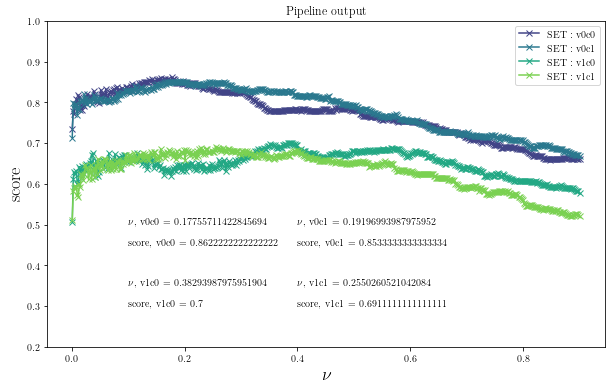

In [99]:
# Plots 
plt.figure(2, figsize=(10, 6))
colors = sns.color_palette("viridis",4)
for j in range(0,4):
    score_vec = score_mtr[j][:];
    plt.plot(nu_vec, score_vec, marker = 'x', color = colors[j], label = 'SET : '+vc[j])
plt.xlabel(r'$\nu$', fontsize = 18)
plt.ylabel('score', fontsize = 18)
plt.ylim([0.2,1])
plt.text(0.1,0.5,r'$\nu$, '+vc[0]+' = '+str(nuopt[0]))
plt.text(0.1,0.45,'score, '+vc[0]+' = '+str(maxscore[0]))
plt.text(0.4,0.5,r'$\nu$, '+vc[1]+' = '+str(nuopt[1]))
plt.text(0.4,0.45,'score, '+vc[1]+' = '+str(maxscore[1]))
plt.text(0.1,0.35,r'$\nu$, '+vc[2]+' = '+str(nuopt[2]))
plt.text(0.1,0.3,'score, '+vc[2]+' = '+str(maxscore[2]))
plt.text(0.4,0.35,r'$\nu$, '+vc[3]+' = '+str(nuopt[3]))
plt.text(0.4,0.3,'score, '+vc[3]+' = '+str(maxscore[3]))
plt.title('Pipeline output')
plt.legend()
plt.savefig('plots_SVM/pipe_out.pdf')


## Stochastic evaluation of the score on mutually_exclusive

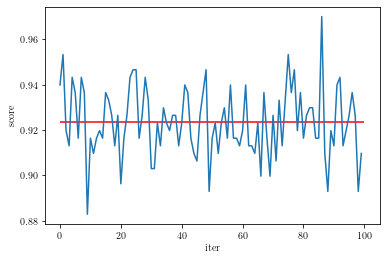

--------------------------------------------
Nsample    : 1000
mean score : 0.923
min  score : 0.883
max  score : 0.970


In [12]:
#K            = 25
seed         = -1 # switch-off fixed seed
test_ratio   = 0.3
Nevaluations = 100
Nsample      = 1000
nu = 0.01 

clf = make_pipeline(StandardScaler(), NuSVC(nu=nu))
score_vec = np.zeros(Nevaluations)
iters     = list(i for i in range(0,Nevaluations))
for i in range(0, Nevaluations):
    dataset = lcd.LoadData('mutually_exclusive', test_ratio=test_ratio, seed=seed, Nsample=Nsample) 
    xtrain  = dataset['xtrain']
    ytrain  = dataset['ytrain']
    xtest   = dataset['xtest']
    ytest   = dataset['ytest']
    clf.fit(xtrain, ytrain)
    
    score_vec[i] = clf.score(xtest, ytest)
        
mean_score = np.mean(score_vec)
plt.figure()
plt.plot(iters, score_vec)
plt.hlines(mean_score, 0, Nevaluations, 'r')
plt.xlabel('iter')
plt.ylabel('score')
plt.show()

print('--------------------------------------------')
print('Nsample    :', Nsample)
print('mean score : {:.3f}'.format(mean_score))
print('min  score : {:.3f}'.format(np.min(score_vec)))
print('max  score : {:.3f}'.format(np.max(score_vec)))